In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [1]:
import os
import shutil
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython

In [2]:
#shutil.copy("drive/MyDrive/TeflonChallenge.tgz", "TeflonChallenge.tgz")

In [3]:
#!tar -xzvf TeflonChallenge.tgz

In [4]:
working_dir = ".."
sr = 44100

In [5]:
aud_file = librosa.load(f"{working_dir}/train/9770.wav", sr=None)

In [4]:
type(aud_file)

tuple

In [5]:
len(aud_file)

2

In [6]:
type(aud_file[0]), type(aud_file[1])

(numpy.ndarray, int)

In [7]:
aud_file[1],aud_file[0].shape

(44100, (132300,))

In [8]:
IPython.display.Audio(f"{working_dir}/train/9770.wav")

In [9]:
44100*3

132300

In [10]:
aud_file[0].shape

(132300,)

In [11]:
librosa.get_duration(y=aud_file[0], sr=aud_file[1])
length = []
for f in os.listdir("../train"):
    aud_file = librosa.load(f"../train/{f}", sr=None)
    length.append(aud_file[0].shape[0]/aud_file[1])
np.max(length)
for f in os.listdir("../test"):
    aud_file = librosa.load(f"../test/{f}", sr=None)
    length.append(aud_file[0].shape[0]/aud_file[1])
len(length)
np.max(length)

3.0

In [5]:
train_df = pd.read_csv(f"{working_dir}/train.csv")
test_df = pd.read_csv(f"{working_dir}/test.csv")

In [13]:
train_df.head()

,File Name,Word,Score
0,9770.wav,hylle,1
1,3631.wav,hylle,5
2,7059.wav,hylle,5
3,9878.wav,hylle,3
4,7847.wav,hylle,4


In [14]:
train_hylle = train_df[train_df.Word=='hylle']

In [15]:
train_hylle.head()

,File Name,Word,Score
0,9770.wav,hylle,1
1,3631.wav,hylle,5
2,7059.wav,hylle,5
3,9878.wav,hylle,3
4,7847.wav,hylle,4


In [16]:
train_hylle[train_hylle.Score==3]

,File Name,Word,Score
3,9878.wav,hylle,3
8,4963.wav,hylle,3
14,7812.wav,hylle,3
16,7022.wav,hylle,3
21,0308.wav,hylle,3
23,0507.wav,hylle,3
28,3176.wav,hylle,3
33,4669.wav,hylle,3
35,4583.wav,hylle,3
37,3044.wav,hylle,3


In [17]:
train_hylle[train_hylle.Score==5]

,File Name,Word,Score
1,3631.wav,hylle,5
2,7059.wav,hylle,5
5,9353.wav,hylle,5
6,6686.wav,hylle,5
10,4775.wav,hylle,5
11,2151.wav,hylle,5
12,7050.wav,hylle,5
13,4547.wav,hylle,5
19,4004.wav,hylle,5
20,7368.wav,hylle,5


In [18]:
train_hylle[train_hylle.Score==2]

,File Name,Word,Score
15,3723.wav,hylle,2
27,7811.wav,hylle,2


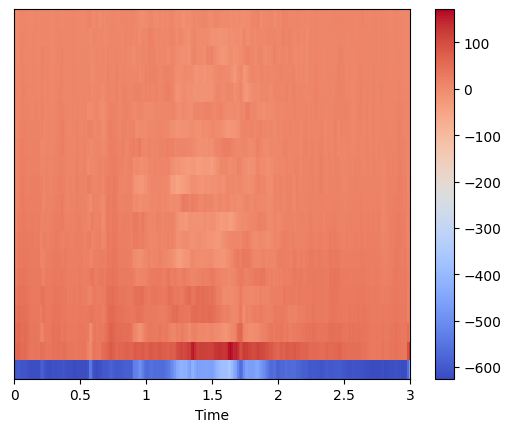

In [34]:
h1 = librosa.load(f"{working_dir}/train/3631.wav", sr=None)

h1_mfcc = librosa.feature.mfcc(y=h1[0], sr=h1[1])

img = librosa.display.specshow(h1_mfcc, x_axis='time', sr=h1[1])
plt.colorbar()

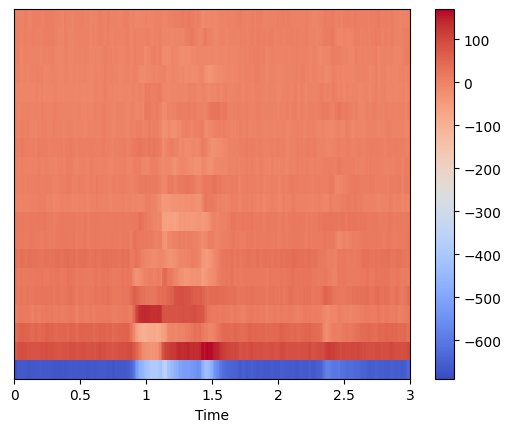

In [32]:
h2 = librosa.load(f"{working_dir}/train/3044.wav", sr=None)

h2_mfcc = librosa.feature.mfcc(y=h2[0], sr=h2[1])

img2 = librosa.display.specshow(h2_mfcc, x_axis='time', sr=h2[1])
plt.colorbar()

In [19]:
trn_bro = train_df[train_df.Word=="bro"]

In [20]:
trn_bro[trn_bro.Score==3]

,File Name,Word,Score
1934,5745.wav,bro,3
1941,4868.wav,bro,3
1945,6051.wav,bro,3
1956,2560.wav,bro,3
1960,2915.wav,bro,3
1964,2691.wav,bro,3
1970,5482.wav,bro,3
1971,8410.wav,bro,3


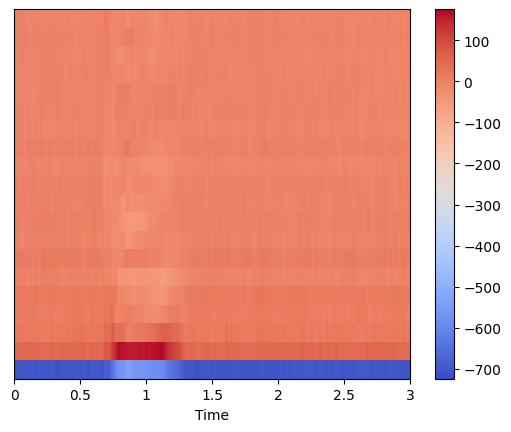

In [ ]:
h2 = librosa.load("../train/2560.wav", sr=None)

h2_mfcc = librosa.feature.mfcc(y=h2[0], sr=h2[1], n_mfcc=20)

img2 = librosa.display.specshow(h2_mfcc, x_axis='time', sr=h2[1])
plt.colorbar()

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_idxs, test_idxs, ytr, ytest = train_test_split(train_df["File Name"],
                                               train_df.Score,
                                               random_state=42,
                                               stratify=train_df.Score, test_size=0.1)

In [8]:
words = train_df.Word.unique()

In [10]:
len(words)

205

In [126]:
len(list(train_idxs)+list(test_idxs))

7857

In [128]:
mfcc_words = {word:[] for word in words}

In [129]:
for i, idx in enumerate(list(train_idxs) + list(test_idxs)):
  word = train_df[train_df["File Name"]==idx].Word.values[0]
  
  aud_file = librosa.load(f"{working_dir}/train/{idx}", sr=None)
  audio = aud_file[0]
  #print(audio.shape)
  if audio.shape[0] != 132300:
    len_zeros = 132300 - audio.shape[0]
    audio = np.concatenate((audio, np.zeros(len_zeros)))

  #print(audio.shape)

  mfcc = librosa.feature.mfcc(y=audio, sr=aud_file[1])
  mfcc_words[word].append(mfcc)

In [130]:
num_samplespw = {k:len(mfcc_words[k]) for k,v in mfcc_words.items()}

In [131]:
num_samplespw["trikk"]

16

In [99]:
for k, v in num_samplespw.items():
    if not v:
        print(k)

In [49]:
train_samples = train_df.query('`File Name` in @train_idxs')

In [50]:
train_samples[train_samples.Word=='trikk'].Score.value_counts()

Score
3    10
4     5
2     1
Name: count, dtype: int64

In [123]:
per_word_m_std = {k:[np.mean(np.array(mfcc_words[k]), axis=0), np.std(np.array(mfcc_words[k]), axis=0)] for k,v in mfcc_words.items()}

In [132]:
all_mfccs = np.concatenate(list(mfcc_words.values()))

In [133]:
all_mfccs.shape

(7857, 20, 259)

In [134]:
global_mean = np.mean(all_mfccs, axis=0)
global_std = np.std(all_mfccs, axis=0)

In [58]:
os.makedirs('train_global_mean')
os.makedirs('train_local_mean')

In [135]:
os.makedirs('test_global_mean')

In [80]:
for f in sorted(os.listdir(f"{working_dir}/train")):
    aud_file = librosa.load(f"{working_dir}/train/{f}", sr=None)
    audio = aud_file[0]
    #print(audio.shape)
    if audio.shape[0] != 132300:
        len_zeros = 132300 - audio.shape[0]
        audio = np.concatenate((audio, np.zeros(len_zeros)))

    #print(audio.shape)

    mfcc = librosa.feature.mfcc(y=audio, sr=aud_file[1])
    corresponding_word = train_df[train_df['File Name']==f].Word.item()
    mfcc = (mfcc - per_word_m_std[corresponding_word][0])/(per_word_m_std[corresponding_word][1] + 1e-8)
    np.save(f"train_local_mean/{f}.npy", mfcc.astype(np.float32))

In [136]:
os.makedirs('train_global_meanall')

In [138]:
for f in sorted(os.listdir(f"{working_dir}/train")):
    aud_file = librosa.load(f"{working_dir}/train/{f}", sr=None)
    audio = aud_file[0]
    #print(audio.shape)
    if audio.shape[0] != 132300:
        len_zeros = 132300 - audio.shape[0]
        audio = np.concatenate((audio, np.zeros(len_zeros)))

    #print(audio.shape)

    mfcc = librosa.feature.mfcc(y=audio, sr=aud_file[1])
    mfcc = (mfcc - global_mean)/global_std
    np.save(f"train_global_meanall/{f}.npy", mfcc.astype(np.float32))

In [139]:
for f in sorted(os.listdir(f"{working_dir}/test")):
    aud_file = librosa.load(f"{working_dir}/test/{f}", sr=None)
    audio = aud_file[0]
    #print(audio.shape)
    if audio.shape[0] != 132300:
        len_zeros = 132300 - audio.shape[0]
        audio = np.concatenate((audio, np.zeros(len_zeros)))

    #print(audio.shape)

    mfcc = librosa.feature.mfcc(y=audio, sr=aud_file[1])
    mfcc = (mfcc - global_mean)/global_std
    np.save(f"test_global_mean/{f}.npy", mfcc.astype(np.float32))

In [120]:
maxes = []
for f in sorted(os.listdir(f"{working_dir}/train")):
    aud_file = librosa.load(f"{working_dir}/train/{f}", sr=None)
    audio = aud_file[0]
    #print(audio.shape)
    if audio.shape[0] != 132300:
        len_zeros = 132300 - audio.shape[0]
        audio = np.concatenate((audio, np.zeros(len_zeros)))

    #print(audio.shape)

    mfcc = librosa.feature.mfcc(y=audio, sr=aud_file[1])
    corresponding_word = train_df[train_df['File Name']==f].Word.item()
    mfcc = (mfcc - per_word_m_std[corresponding_word][0])
    maxes.append(np.max(np.abs(mfcc)))
    np.save(f"train_normbest/{f}.npy", mfcc.astype(np.float32))

In [121]:
np.max(maxes)

660.3399446191277

In [108]:
!pwd

/data/home/adeola/Downloads/TeflonChallenge/nocasa


In [126]:
ms = []
for f in os.listdir("train_normbest"):
    mf = np.load(f"train_normbest/{f}")
    ms.append(np.max(np.abs(mf)))

In [127]:
np.max(ms)

660.33997

In [104]:
len(os.listdir("train_global_mean/")), len(os.listdir("train_local_mean/")), len(os.listdir("train_normbest"))

(7857, 7857, 7857)

In [105]:
mf = np.load("train_normbest/0000.wav.npy")

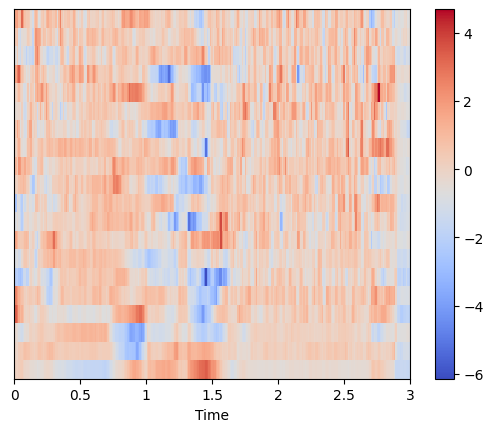

In [106]:
img2 = librosa.display.specshow(mf, x_axis='time', sr=44100)
plt.colorbar()

In [140]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import transformers
from transformers import set_seed
from transformers import get_scheduler
from tqdm import tqdm
import os
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import wandb
import copy
import timm
import shutil
import torchio as tio
from skimage.metrics import structural_similarity
import random
import traceback

wandb.login()

True

In [141]:
train_idxs[0]

'9770.wav'

In [142]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, idxs, base_dir):
        self.idxs = sorted(idxs)
        self.base_dir = base_dir
    def __len__(self):
        return len(self.idxs)
    def __getitem__(self, idx):
        file_idx = self.idxs[idx]
        mfcc = np.load(f"{self.base_dir}/{file_idx}.npy")
        score = train_df[train_df['File Name']==file_idx].Score.item()
        return (torch.tensor(mfcc).unsqueeze(0), torch.tensor(score-1, dtype = torch.long), file_idx)

In [148]:
trn_ds = CustomDataset(list(train_idxs)+list(test_idxs), "train_global_meanall")

In [99]:
val_ds = CustomDataset(list(test_idxs), "train_global_mean")

In [149]:
len(trn_ds), len(val_ds)

(7857, 786)

In [101]:
trn_ds[0]

(tensor([[[ 0.1552,  0.2207,  0.1904,  ..., -0.3696, -0.3760, -0.3735],
          [ 0.1897,  0.2147,  0.2066,  ..., -0.8535, -0.8600, -0.8793],
          [-0.1274, -0.3557, -0.5239,  ..., -0.5115, -0.5249, -0.5802],
          ...,
          [-1.5302, -0.4307,  0.1072,  ..., -0.3613, -0.3709, -0.3527],
          [-1.2023,  0.4000,  0.4889,  ..., -0.2758, -0.2868, -0.2699],
          [ 1.3520,  1.7705,  2.1729,  ..., -0.3243, -0.3323, -0.3044]]]),
 tensor(3),
 '0000.wav')

In [21]:
train_df[train_df['File Name']=='0004.wav']

,File Name,Word,Score
7736,0004.wav,prins,5


In [26]:
device = torch.device("cuda")

In [27]:
base_model = timm.create_model("resnet18", pretrained=True, num_classes=5)

In [28]:
base_model.conv1

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

In [29]:
base_model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3),
                            bias=False)

In [30]:
base_model.fc

Linear(in_features=512, out_features=5, bias=True)

In [31]:
len(words)

205

In [32]:
base_model.fc = nn.Identity()

In [14]:
words

array(['hylle', 'artist', 'kart', 'syr', 'jern', 'lytte', 'barn', 'lun',
       'enhjoerning', 'glass', 'bra', 'syl', 'loepe', 'rund', 'bror',
       'kvern', 'huske', 'trikk', 'taer', 'sykkel', 'koffert', 'tralle',
       'bleie', 'sjoe', 'svare', 'ugle', 'dykke', 'drops', 'flagg',
       'sjakk', 'skjorte', 'stjerne', 'mur', 'oern', 'dyne', 'skive',
       'frukt', 'skinke', 'hjoerne', 'klar', 'plante', 'oere', 'myr',
       'soet', 'braa', 'sverd', 'oedelagt', 'hus', 'plaster', 'skjema',
       'bryter', 'kikkert', 'bro', 'synge', 'flue', 'staer', 'syk',
       'hjerte', 'flakse', 'sjiraff', 'soeppel', 'sport', 'stupe',
       'fjorten', 'smykke', 'soester', 'trille', 'fortid', 'klappe',
       'noekkel', 'soelv', 'trapp', 'krone', 'fort', 'lyn', 'klaer',
       'doer', 'trykk', 'baer', 'loeve', 'fjaer', 'sylte', 'laerer',
       'skjerm', 'svart', 'blaa', 'trylle', 'blomst', 'froe', 'krakk',
       'gul', 'knar', 'smerte', 'grave', 'vindu', 'garn', 'mus',
       'skilpadde', 'svaer

In [15]:
class Model(nn.Module):
    def __init__(self, base):
        super().__init__()
        self.base = base
        self.fc = nn.ModuleDict({word:nn.Sequential(nn.Linear(512, 256), nn.ReLU(), nn.Linear(256, 5)) for word in words})
    def forward(self, x, fn):
        feats = self.base(x)
        out = []
        for i, feat in enumerate(feats):
            inp_word = train_df[train_df['File Name']==fn[i]].Word.values[0]
            pout = self.fc[inp_word](feat)
            out.append(pout.squeeze())

        out = torch.vstack(out).to(feats.device)
        return out

In [26]:
m = Model(base_model)

In [24]:
tt = torch.eye(10)

In [196]:
o = []
for i, t in enumerate(tt):
    o.append(t)
    print(i, t)

0 tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
1 tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])
2 tensor([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])
3 tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])
4 tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])
5 tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])
6 tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])
7 tensor([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])
8 tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])
9 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])


In [205]:
torch.vstack(o).to(device).shape

torch.Size([10, 10])

In [209]:
t.shape

torch.Size([10])

In [154]:
trn_ds[0][0].shape

torch.Size([1, 20, 259])

In [32]:
out = base_model(trn_ds[0][0].unsqueeze(0))

In [164]:
out2 = m(trn_ds[0][0].unsqueeze(0), trn_ds[0][2])

skjema


In [161]:
out2

tensor([[-0.1030,  0.0697,  0.0935,  0.0394,  0.1336]],
       grad_fn=<AddmmBackward0>)

In [166]:
m

Model(
  (base): ResNet(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (drop_block): Identity()
        (act1): ReLU(inplace=True)
        (aa): Identity()
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act2): ReLU(inplace=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bi

In [144]:
class AverageMeter:
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

In [145]:
def training(train_loader, model, criterion, optimizer, scheduler, device, scaler, accum_steps = 1, useauto = False):
    """
    Train a model.

    Args:
    - train_loader (torch.utils.data.DataLoader): The training data loader.
    - model (torch.nn.Module): The model to train.
    - criterion (torch.nn.Module): The loss function.
    - optimizer (torch.optim.Optimizer): The optimizer.
    - scheduler (torch.optim.lr_scheduler._LRScheduler): The learning rate scheduler.
    - device (torch.device): The device to run training on.

    Returns:
    - dict: A dictionary containing the average loss and accuracy.
    """
    print('\nTraining...')
    avg_meters = {"loss": AverageMeter(), "acc":AverageMeter()}

    model.train()
    model.to(device)
    model_ema = timm.utils.ModelEma(model, device=device)
    #print("Number of bacthes (training): ", len(train_loader))
    epoch_grad_norm = 0.0
    steps = 0
    autodtype = torch.float16 if useauto else torch.float32


    for batch_idx, (data, labels, fn) in enumerate(train_loader):
        data, labels = data.to(device), labels.to(device)

        try:
            with torch.autocast(device_type=device.type, dtype=autodtype):
                output = model(data)
                
                loss =   criterion(output, labels) # + criterion(output_ft, labels_ft)
            if torch.isnan(loss):
                print(f"\nNaN loss encountered in batch {batch_idx} !!!!")
                continue  # Skip this batch
            #loss.backward()
            scaler.scale(loss/accum_steps).backward()
            scale = scaler.get_scale()

            # Gradient clipping
            #torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0) did not use gradient clipping while testing
            if (steps+1)%accum_steps == 0:
                scaler.step(optimizer)
                scaler.update()
                if (scaler.get_scale() >= scale):
                    scheduler.step()  # Correct placement for OneCycleLR scheduler, inside the batch loop
                model_ema.update(model)
                #for p in model.parameters():
                    #epoch_grad_norm += torch.abs(p.grad).sum()
                optimizer.zero_grad()
                acc = (output.argmax(dim=-1) == labels).float().mean()
                
                avg_meters["loss"].update(loss.item(), data.size(0))
                avg_meters["acc"].update(acc.item(), data.size(0))

            
        except Exception as e:
            
            print(
                f"\nAn error occurred during training in batch {batch_idx}: {e}")
            print(traceback.format_exc())
            return

        
        steps += 1
        
        #wandb.log({"train_lossb": avg_meters['loss'].avg})
        #print(f'\nEnd of Batch {batch_idx} - Average Training Loss: {avg_meters["loss"].avg}')
    
    

    # print(f'\nEnd of Training - Average Loss: {avg_meters["loss"].avg}, Average Accuracy: {avg_meters["acc"].avg}')
    optimizer.zero_grad()
    return {"loss": avg_meters["loss"].avg, "acc":avg_meters["acc"].avg}, epoch_grad_norm

def validation(validation_loader, model, criterion, device, useauto=False):
    """
    Validate a model.

    Args:
    - validation_loader (torch.utils.data.DataLoader): The validation data loader.
    - model (torch.nn.Module): The model to validate.
    - criterion (torch.nn.Module): The loss function.
    - device (torch.device): The device to run validation on.

    Returns:
    - dict: A dictionary containing the average loss and accuracy.
    """
    print("\nValidating...")
    avg_meters = {"loss": AverageMeter(), "acc":AverageMeter()}

    model.eval()
    model.to(device)
    autodtype = torch.float16 if useauto else torch.float32
    #print("Number of bacthes (validation): ", len(validation_loader))

    try:
        with torch.no_grad():
            for batch_idx, (data, labels, fn) in enumerate(validation_loader):
                # No need to check for batch size if DataLoader is set to drop_last=True
                data, labels = data.to(device), labels.to(device)
                
                with torch.autocast(device_type=device.type, dtype=autodtype):
                    # Make prediction.
                    output = model(data)

                    # Calculate the loss.
                    loss = criterion(output, labels)
                    acc = (output.argmax(dim=-1) == labels).float().mean()
                avg_meters["loss"].update(loss.item(), data.size(0))
                avg_meters["acc"].update(acc.item(), data.size(0))
                #wandb.log({"val_lossb": avg_meters['loss'].avg})
                #print(f'\nEnd of Batch {batch_idx} - Average Training Loss: {avg_meters["loss"].avg}')

        # print(f'\nAverage Validation Loss: {avg_meters["loss"].avg}, Average Validation Accuracy: {avg_meters["acc"].avg}')
        return {"loss": avg_meters["loss"].avg, "acc":avg_meters["acc"].avg}
    except Exception as e:
        print(f"\nAn error occurred during validation: {e}")
        print(traceback.format_exc())
        return {"loss": None, "acc": None}

In [146]:

def main_training_loop(train_func, val_func, num_epochs, device, run_name, loss, model, bs, lr, accum_steps, useauto=False):

    run = wandb.init(
          project="nocasa",
          config={
              "bs": bs,
              "num_epochs": num_epochs,
              "lr":lr
          },
          name=run_name
      )

    #criterion = nn.CrossEntropyLoss(weight=torch.tensor(weights, dtype=torch.float32, device=device))
    #criterion = nn.L1Loss()
    criterion = loss

    decay_list = []
    no_decay_list = []

    for n, m in model.named_parameters():
        if "bn" in n:
            no_decay_list.append(m)
        else:
            decay_list.append(m)

    param_list = [{"params":decay_list, "weight_decay":1e-3}, {"params":no_decay_list, "weight_decay":0.0}]


    optimizer = torch.optim.Adam(param_list, lr= lr, betas = (0.9, 0.999))

    scheduler = get_scheduler("linear", optimizer, num_warmup_steps=50, num_training_steps=(num_epochs*len(trn_dl))/accum_steps)
    scaler = torch.amp.GradScaler(device.type)

    min_error = 100
    best_model = None
    grad_norms = []
    for epoch in tqdm(range(num_epochs)):
        

      train_results, epoch_grad_norm = train_func(trn_dl, model, criterion, optimizer, scheduler, device, scaler, accum_steps, useauto)
      #val_results = val_func(val_dl, model, criterion, device, useauto)
      grad_norms.append(epoch_grad_norm)
      #wandb.log({"train_loss": train_results['loss'], 
       #             "val_loss": val_results['loss'],
        #        "train_acc":train_results["acc"], "val_acc":val_results["acc"]})
      wandb.log({"train_loss": train_results['loss'],
                "train_acc":train_results["acc"],})


      #print(f"Epoch {epoch+1}/{num_epochs} Train Loss: {train_results['loss']:.4f} Val Loss: {val_results['loss']:.4f} Train Acc: {train_results['acc']:.4f} Val Acc: {val_results['acc']:.4f}")
      print(f"Epoch {epoch+1}/{num_epochs} Train Loss: {train_results['loss']:.4f} Train Acc: {train_results['acc']:.4f}")

      #if val_results['loss'] < min_error:
      #  min_error = val_results['loss']
      #  best_model = copy.deepcopy(model)
      #  torch.save(best_model.state_dict(), f"models/model_{run_name}.pth")
    if train_results["loss"]<min_error:
        min_error = train_results['loss']
        best_model = copy.deepcopy(model)
        torch.save(best_model.state_dict(), f"models/model_{run_name}.pth")

    torch.cuda.empty_cache()
    wandb.finish()
    return best_model, grad_norms

In [150]:
len(trn_ds)

7857

In [151]:
base_model = timm.create_model("resnet18", num_classes=5)
base_model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3),
                            bias=False)

bs = 64
loss = nn.CrossEntropyLoss()
lr = 1e-4
accum_steps = 1

trn_dl = torch.utils.data.DataLoader(trn_ds, batch_size=bs, shuffle=True)
#val_dl = torch.utils.data.DataLoader(val_ds, batch_size=bs, shuffle=False)

bm = main_training_loop(training, validation, 10, device, "cnnfinal_sub", loss, base_model, bs, lr, accum_steps, useauto=False)

  0%|                                                    | 0/10 [00:00<?, ?it/s]


Training...


 10%|████▍                                       | 1/10 [00:11<01:43, 11.53s/it]

Epoch 1/10 Train Loss: 1.4395 Train Acc: 0.3408

Training...


 20%|████████▊                                   | 2/10 [00:24<01:37, 12.18s/it]

Epoch 2/10 Train Loss: 1.2691 Train Acc: 0.4458

Training...


 30%|█████████████▏                              | 3/10 [00:36<01:26, 12.34s/it]

Epoch 3/10 Train Loss: 1.2168 Train Acc: 0.4723

Training...


 40%|█████████████████▌                          | 4/10 [00:49<01:14, 12.42s/it]

Epoch 4/10 Train Loss: 1.1819 Train Acc: 0.4881

Training...


 50%|██████████████████████                      | 5/10 [01:01<01:02, 12.45s/it]

Epoch 5/10 Train Loss: 1.1499 Train Acc: 0.5017

Training...


 60%|██████████████████████████▍                 | 6/10 [01:14<00:49, 12.47s/it]

Epoch 6/10 Train Loss: 1.0997 Train Acc: 0.5340

Training...


 70%|██████████████████████████████▊             | 7/10 [01:26<00:37, 12.49s/it]

Epoch 7/10 Train Loss: 1.0301 Train Acc: 0.5811

Training...


 80%|███████████████████████████████████▏        | 8/10 [01:39<00:25, 12.52s/it]

Epoch 8/10 Train Loss: 0.9328 Train Acc: 0.6588

Training...


 90%|███████████████████████████████████████▌    | 9/10 [01:51<00:12, 12.55s/it]

Epoch 9/10 Train Loss: 0.8435 Train Acc: 0.7290

Training...


100%|███████████████████████████████████████████| 10/10 [02:04<00:00, 12.45s/it]

Epoch 10/10 Train Loss: 0.7812 Train Acc: 0.7801


train_acc,▁▃▃▃▄▄▅▆▇█
train_loss,█▆▆▅▅▄▄▃▂▁
train_acc,0.78007
train_loss,0.78123


In [53]:
wandb.finish()

train_acc,▁
train_loss,▁
train_acc,0.32584
train_loss,1.46024


In [54]:
torch.cuda.empty_cache()

In [243]:
s = train_samples.Score.value_counts().sum()

In [244]:
weights = [s/v for v in train_samples.Score.value_counts()]

In [246]:
weights.reverse()

In [247]:
torch.tensorweights

[59.42016806722689,
 9.780082987551868,
 3.5109235352532275,
 3.4011544011544013,
 3.3103932584269664]

In [154]:
def make_model(mt, path):
    base_model = timm.create_model("resnet18", num_classes=5)
    base_model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3),
                            bias=False)
    if mt=="multihead":
        base_model.fc = nn.Identity()
        m = Model(base_model)
        m.load_state_dict(torch.load(path, weights_only=True))
        return m
    base_model.load_state_dict(torch.load(path, weights_only=True))
    return base_model

In [47]:
val_samples = train_df.query('`File Name` in @test_idxs')

In [48]:
val_samples.head()

,File Name,Word,Score
4,7847.wav,hylle,4
25,2276.wav,hylle,4
29,9192.wav,hylle,5
37,3044.wav,hylle,3
39,4538.wav,hylle,3


In [164]:
single_model = make_model("nn", "models/model_cnnfinal_sub.pth")

In [165]:
single_model.to(device)

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
      (act1): ReLU(inplace=True)
      (aa): Identity()
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act2): ReLU(inplace=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, m

In [157]:
test_df.head()

,File Name,Word
0,0421.wav,hylle
1,7213.wav,hylle
2,5617.wav,hylle
3,4179.wav,hylle
4,0270.wav,hylle


In [167]:
class CustomDatasetT(torch.utils.data.Dataset):
    def __init__(self, idxs, base_dir):
        self.idxs = sorted(idxs)
        self.base_dir = base_dir
    def __len__(self):
        return len(self.idxs)
    def __getitem__(self, idx):
        file_idx = self.idxs[idx]
        mfcc = np.load(f"{self.base_dir}/{file_idx}.npy")
        return (torch.tensor(mfcc).unsqueeze(0), file_idx)

In [168]:
ds = CustomDatasetT(test_df['File Name'], "test_global_mean/")
loader = torch.utils.data.DataLoader(ds, batch_size=128, shuffle=False)

In [169]:
len(ds)

1460

In [170]:
single_model.eval()
all_preds = []
all_fns = []
with torch.no_grad():
    for data, fn in loader:
        data = data.to(device)
        preds = single_model(data)
        preds = preds.argmax(dim=-1)
        all_preds.append(preds.detach().cpu().numpy())
        all_fns.append(fn)

In [171]:
len(all_preds), len(all_fns)

(12, 12)

In [172]:
all_preds = np.concatenate(all_preds)

In [173]:
all_preds.shape

(1460,)

In [174]:
all_fns = np.concatenate(all_fns)

In [175]:
all_fns.shape

(1460,)

In [181]:
pred_df = pd.DataFrame({'File Name':all_fns, 'predicted':all_preds+1})

In [182]:
pred_df.head()

,File Name,predicted
0,0031.wav,3
1,0044.wav,5
2,0054.wav,5
3,0058.wav,3
4,0068.wav,4


In [183]:
res = pd.merge(left=test_df, right=pred_df, on='File Name')

In [184]:
res.head()

,File Name,Word,predicted
0,0421.wav,hylle,4
1,7213.wav,hylle,5
2,5617.wav,hylle,5
3,4179.wav,hylle,3
4,0270.wav,hylle,4


In [185]:
res.to_csv("cnn_pred.csv", index=False)

In [273]:
res[res['File Name']=="0004.wav"]

,File Name,Word,Score,preds
766,0004.wav,prins,5,2


In [279]:
res.preds = res.preds + 1

In [280]:
res[res['File Name']=="0004.wav"]

,File Name,Word,Score,preds
766,0004.wav,prins,5,3


In [276]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [286]:
aa = confusion_matrix(res.Score, res.preds)

In [287]:
aa

array([[  0,   5,   7,   1,   0],
       [  0,   9,  43,  22,   7],
       [  0,  12, 113,  76,  23],
       [  0,  11,  72,  80,  68],
       [  0,   1,  38,  41, 157]])

In [281]:
accuracy_score(res.Score, res.preds)

0.45674300254452926

In [288]:
aa[0]

array([0, 5, 7, 1, 0])

In [289]:
for i in range(5):
    print(aa[i, i]/aa[i].sum())

0.0
0.1111111111111111
0.5044642857142857
0.3463203463203463
0.6624472573839663


In [152]:
multi_model = make_model("nn", "models/model_cnnfinal_sub.pth")

NameError: name 'make_model' is not defined

In [291]:
multi_model.to(device)

Model(
  (base): ResNet(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (drop_block): Identity()
        (act1): ReLU(inplace=True)
        (aa): Identity()
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act2): ReLU(inplace=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bi

In [292]:
multi_model.eval()
all_preds = []
all_fns = []
with torch.no_grad():
    for data, score, fn in loader:
        data = data.to(device)
        preds = multi_model(data, fn)
        preds = preds.argmax(dim=-1)
        all_preds.append(preds.detach().cpu().numpy())
        all_fns.append(fn)

In [293]:
all_preds = np.concatenate(all_preds)

In [294]:
all_preds.shape

(786,)

In [295]:
all_fns = np.concatenate(all_fns)

In [296]:
multi_preds_df = pd.DataFrame({'File Name':all_fns, 'preds':all_preds+1})

In [297]:
multi_res = pd.merge(left=val_samples, right=multi_preds_df, on='File Name')

In [298]:
accuracy_score(multi_res.Score, multi_res.preds)

0.42493638676844786

In [301]:
confusion_matrix(multi_res.Score, multi_res.preds)

array([[  0,   2,   7,   2,   2],
       [  0,  12,  38,  19,  12],
       [  0,  13, 101,  80,  30],
       [  0,   6,  62,  92,  71],
       [  0,   5,  46,  57, 129]])

In [314]:
hylle_pred = multi_res[multi_res['Word']=="hylle"]

In [315]:
hylle_pred

,File Name,Word,Score,preds
0,7847.wav,hylle,4,3
1,2276.wav,hylle,4,3
2,9192.wav,hylle,5,4
3,3044.wav,hylle,3,4
4,4538.wav,hylle,3,4
5,2380.wav,hylle,5,5
6,4550.wav,hylle,5,4


In [30]:
import scipy.io.wavfile as wavfile
import soundfile as sf

In [385]:
for f in os.listdir(f"../train"):
    aud = librosa.load(f"../train/{f}", sr=None)
    audio = aud[0]
    if audio.shape[0] != 132300:
        len_zeros = 132300 - audio.shape[0]
        audio = np.concatenate((audio, np.zeros(len_zeros)))
    resampled = librosa.resample(y=audio, orig_sr=aud[1], target_sr=16000)
    sf.write(f"resampled_data/{f}", resampled, 16000)

In [389]:
IPython.display.Audio(f"../train/0085.wav", rate=16000)

In [355]:
for f in os.listdir("../train"):
    aud = librosa.load(f"../train/{f}", sr=None)
    length = aud[0].shape[0]/aud[1]
    print(aud[1])
    break

44100


In [359]:
132300/22050

6.0

In [387]:
f

'7756.wav'

In [19]:
from transformers import Wav2Vec2ForSequenceClassification

In [20]:
model = Wav2Vec2ForSequenceClassification.from_pretrained("NbAiLab/nb-wav2vec2-300m-nynorsk")

Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at NbAiLab/nb-wav2vec2-300m-nynorsk and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [392]:
resampled.shape

(48000,)

In [393]:
res = model(torch.from_numpy(resampled).unsqueeze(0))

In [394]:
res.logits

tensor([[-0.0691,  0.1586]], grad_fn=<AddmmBackward0>)

In [31]:
model

Wav2Vec2ForSequenceClassification(
  (wav2vec2): Wav2Vec2Model(
    (feature_extractor): Wav2Vec2FeatureEncoder(
      (conv_layers): ModuleList(
        (0): Wav2Vec2LayerNormConvLayer(
          (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,))
          (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (activation): GELUActivation()
        )
        (1-4): 4 x Wav2Vec2LayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,))
          (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (activation): GELUActivation()
        )
        (5-6): 2 x Wav2Vec2LayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,))
          (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (activation): GELUActivation()
        )
      )
    )
    (feature_projection): Wav2Vec2FeatureProjection(
      (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=

In [21]:
for p in model.wav2vec2.feature_extractor.parameters():
    p.requires_grad = False

In [22]:
class CustomDataset2(torch.utils.data.Dataset):
    def __init__(self, idxs, base_dir):
        self.idxs = sorted(idxs)
        self.base_dir = base_dir
    def __len__(self):
        return len(self.idxs)
    def __getitem__(self, idx):
        file_idx = self.idxs[idx]
        mfcc = librosa.load(f"{self.base_dir}/{file_idx}", sr=None)
        score = train_df[train_df['File Name']==file_idx].Score.item()
        return (torch.tensor(mfcc[0]), torch.tensor(score-1, dtype = torch.long), file_idx)

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [34]:
class Wav2VecFeats(nn.Module):
    def __init__(self, base):
        super().__init__()
        self.base = copy.deepcopy(base)
        self.base.wav2vec2.encoder = nn.Identity()
        self.project = nn.Linear(512, 256)
        self.classifier = nn.Linear(256, 5)
    def forward(self, x):
        x = self.base.wav2vec2.feature_extractor(x)
        x = torch.mean(x, dim=-1)
        x = self.classifier(F.relu(self.project(x)))
        return x

In [64]:
base_model

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
      (act1): ReLU(inplace=True)
      (aa): Identity()
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act2): ReLU(inplace=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, m

In [85]:
class Wav2VecFeatsCNN(nn.Module):
    def __init__(self, base, resnet):
        super().__init__()
        self.base = copy.deepcopy(base)
        self.base.wav2vec2.encoder = nn.Identity()
        self.bn = nn.BatchNorm2d(1)
        self.resnet = resnet
        self.resnet.fc = nn.Linear(512, 5)
    def forward(self, x):
        x = self.base.wav2vec2.feature_extractor(x)
        x = x.unsqueeze(1)
        x = self.bn(x)
        x = self.resnet(x)
        return x

In [86]:
modelwvcnn = Wav2VecFeatsCNN(model, base_model)

In [89]:
bs = 32
loss = nn.CrossEntropyLoss()
lr = 1e-5
accum_steps = 1

model = Wav2Vec2ForSequenceClassification.from_pretrained("NbAiLab/nb-wav2vec2-300m-nynorsk")
for p in model.wav2vec2.feature_extractor.parameters():
    p.requires_grad = False

trn_ds = CustomDataset2(train_idxs, "resampled_data")
val_ds = CustomDataset2(test_idxs, "resampled_data")
trn_dl = torch.utils.data.DataLoader(trn_ds, batch_size=bs, shuffle=True)
val_dl = torch.utils.data.DataLoader(val_ds, batch_size=bs, shuffle=False)

mm = Wav2VecFeatsCNN(model, base_model)

bm = main_training_loop(training, validation, 10, device, "wav2vec2cnn", loss, mm, bs, lr, accum_steps, useauto=True)

Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at NbAiLab/nb-wav2vec2-300m-nynorsk and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|                                                    | 0/10 [00:00<?, ?it/s]


Training...

Validating...
Epoch 1/10 Train Loss: 1.5200 Val Loss: 1.4580 Train Acc: 0.3736 Val Acc: 0.3842


 10%|████▍                                       | 1/10 [00:54<08:12, 54.68s/it]


Training...

Validating...
Epoch 2/10 Train Loss: 1.0344 Val Loss: 1.3623 Train Acc: 0.8956 Val Acc: 0.4237


 20%|████████▊                                   | 2/10 [01:48<07:12, 54.08s/it]


Training...

Validating...
Epoch 3/10 Train Loss: 0.7730 Val Loss: 1.3529 Train Acc: 0.9183 Val Acc: 0.4249


 30%|█████████████▏                              | 3/10 [02:42<06:20, 54.32s/it]


Training...

Validating...


 40%|█████████████████▌                          | 4/10 [03:35<05:22, 53.82s/it]

Epoch 4/10 Train Loss: 0.6232 Val Loss: 1.3622 Train Acc: 0.9341 Val Acc: 0.4198

Training...

Validating...


 50%|██████████████████████                      | 5/10 [04:28<04:27, 53.51s/it]

Epoch 5/10 Train Loss: 0.5355 Val Loss: 1.3791 Train Acc: 0.9381 Val Acc: 0.4211

Training...

Validating...


 60%|██████████████████████████▍                 | 6/10 [05:21<03:33, 53.35s/it]

Epoch 6/10 Train Loss: 0.4651 Val Loss: 1.4007 Train Acc: 0.9529 Val Acc: 0.4173

Training...

Validating...


 70%|██████████████████████████████▊             | 7/10 [06:15<02:39, 53.30s/it]

Epoch 7/10 Train Loss: 0.4246 Val Loss: 1.4117 Train Acc: 0.9569 Val Acc: 0.4224

Training...

Validating...


 80%|███████████████████████████████████▏        | 8/10 [07:08<01:46, 53.43s/it]

Epoch 8/10 Train Loss: 0.3935 Val Loss: 1.4213 Train Acc: 0.9634 Val Acc: 0.4186

Training...

Validating...


 90%|███████████████████████████████████████▌    | 9/10 [08:01<00:53, 53.26s/it]

Epoch 9/10 Train Loss: 0.3790 Val Loss: 1.4257 Train Acc: 0.9638 Val Acc: 0.4186

Training...

Validating...


100%|███████████████████████████████████████████| 10/10 [08:54<00:00, 53.48s/it]

Epoch 10/10 Train Loss: 0.3709 Val Loss: 1.4362 Train Acc: 0.9620 Val Acc: 0.4135


train_acc,▁▇▇███████
train_loss,█▅▃▃▂▂▁▁▁▁
val_acc,▁██▇▇▇█▇▇▆
val_loss,█▂▁▂▃▄▅▆▆▇
train_acc,0.96196
train_loss,0.37087
val_acc,0.41349
val_loss,1.43618


In [49]:
class Wav2VecClf(nn.Module):
    def __init__(self, base):
        super().__init__()
        self.base = copy.deepcopy(base)
        self.base.classifier = nn.Linear(256, 128)
        self.fc = nn.ModuleDict({word:nn.Sequential(nn.Linear(128, 5)) for word in words})
    def forward(self, x, fn):
        x = F.relu(self.base(x).logits)
        out = []
        for i, feat in enumerate(x):
            inp_word = train_df[train_df['File Name']==fn[i]].Word.values[0]
            pout = self.fc[inp_word](feat)
            out.append(pout.squeeze())

        out = torch.vstack(out).to(x.device)
        return out

In [50]:
bs = 16
loss = nn.CrossEntropyLoss()
lr = 1e-5
accum_steps = 1

model = Wav2Vec2ForSequenceClassification.from_pretrained("NbAiLab/nb-wav2vec2-300m-nynorsk")
for p in model.wav2vec2.feature_extractor.parameters():
    p.requires_grad = False

trn_ds = CustomDataset2(train_idxs, "resampled_data")
val_ds = CustomDataset2(test_idxs, "resampled_data")
trn_dl = torch.utils.data.DataLoader(trn_ds, batch_size=bs, shuffle=True)
val_dl = torch.utils.data.DataLoader(val_ds, batch_size=bs, shuffle=False)

mm = Wav2VecClf(model)

bm = main_training_loop(training, validation, 10, device, "wav2vecfullmulti", loss, mm, bs, lr, accum_steps, useauto=True)

  0%|                                                                                                                                                                                            | 0/10 [00:00<?, ?it/s]


Training...

Validating...
Epoch 1/10 Train Loss: 1.6071 Val Loss: 1.6052 Train Acc: 0.2099 Val Acc: 0.1985


 10%|█████████████████▉                                                                                                                                                                 | 1/10 [02:34<23:10, 154.51s/it]


Training...

Validating...
Epoch 2/10 Train Loss: 1.5974 Val Loss: 1.6018 Train Acc: 0.2284 Val Acc: 0.2061


 20%|███████████████████████████████████▊                                                                                                                                               | 2/10 [05:24<21:48, 163.56s/it]


Training...

Validating...
Epoch 3/10 Train Loss: 1.5913 Val Loss: 1.5989 Train Acc: 0.2425 Val Acc: 0.2226


 30%|█████████████████████████████████████████████████████▋                                                                                                                             | 3/10 [08:17<19:34, 167.73s/it]


Training...

Validating...
Epoch 4/10 Train Loss: 1.5862 Val Loss: 1.5959 Train Acc: 0.2571 Val Acc: 0.2265


 40%|███████████████████████████████████████████████████████████████████████▌                                                                                                           | 4/10 [11:09<16:57, 169.51s/it]


Training...

Validating...
Epoch 5/10 Train Loss: 1.5816 Val Loss: 1.5935 Train Acc: 0.2609 Val Acc: 0.2354


 50%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                                                         | 5/10 [14:01<14:12, 170.58s/it]


Training...

Validating...
Epoch 6/10 Train Loss: 1.5775 Val Loss: 1.5898 Train Acc: 0.2705 Val Acc: 0.2405


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                       | 6/10 [16:50<11:19, 169.85s/it]


Training...

Validating...
Epoch 7/10 Train Loss: 1.5743 Val Loss: 1.5880 Train Acc: 0.2745 Val Acc: 0.2417


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                     | 7/10 [19:41<08:31, 170.35s/it]


Training...

Validating...
Epoch 8/10 Train Loss: 1.5710 Val Loss: 1.5858 Train Acc: 0.2800 Val Acc: 0.2417


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 8/10 [22:32<05:41, 170.54s/it]


Training...

Validating...
Epoch 9/10 Train Loss: 1.5694 Val Loss: 1.5848 Train Acc: 0.2831 Val Acc: 0.2417


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 9/10 [25:25<02:51, 171.19s/it]


Training...

Validating...
Epoch 10/10 Train Loss: 1.5678 Val Loss: 1.5847 Train Acc: 0.2833 Val Acc: 0.2417


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [28:19<00:00, 169.92s/it]


train_acc,▁▃▄▆▆▇▇███
train_loss,█▆▅▄▃▃▂▂▁▁
val_acc,▁▂▅▆▇█████
val_loss,█▇▆▅▄▃▂▁▁▁
train_acc,0.28327
train_loss,1.5678
val_acc,0.24173
val_loss,1.58468


In [51]:
torch.cuda.empty_cache()

In [52]:
bs = 16
loss = nn.CrossEntropyLoss()
lr = 7e-5
accum_steps = 1

model = Wav2Vec2ForSequenceClassification.from_pretrained("NbAiLab/nb-wav2vec2-300m-nynorsk")
for p in model.wav2vec2.feature_extractor.parameters():
    p.requires_grad = False

trn_ds = CustomDataset2(train_idxs, "resampled_data")
val_ds = CustomDataset2(test_idxs, "resampled_data")
trn_dl = torch.utils.data.DataLoader(trn_ds, batch_size=bs, shuffle=True)
val_dl = torch.utils.data.DataLoader(val_ds, batch_size=bs, shuffle=False)

mm = Wav2VecClf(model)

bm = main_training_loop(training, validation, 80, device, "wav2vecfullmulti8", loss, mm, bs, lr, accum_steps, useauto=True)

Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at NbAiLab/nb-wav2vec2-300m-nynorsk and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|                                                                                                                                                                                            | 0/80 [00:00<?, ?it/s]


Training...

Validating...
Epoch 1/80 Train Loss: 1.6073 Val Loss: 1.5980 Train Acc: 0.2233 Val Acc: 0.2506


  1%|██▏                                                                                                                                                                              | 1/80 [02:39<3:29:48, 159.35s/it]


Training...

Validating...
Epoch 2/80 Train Loss: 1.5815 Val Loss: 1.5852 Train Acc: 0.2597 Val Acc: 0.2608


  2%|████▍                                                                                                                                                                            | 2/80 [05:30<3:36:20, 166.42s/it]


Training...

Validating...
Epoch 3/80 Train Loss: 1.5415 Val Loss: 1.5507 Train Acc: 0.2905 Val Acc: 0.2926


  4%|██████▋                                                                                                                                                                          | 3/80 [08:24<3:37:37, 169.58s/it]


Training...

Validating...
Epoch 4/80 Train Loss: 1.4955 Val Loss: 1.5277 Train Acc: 0.3206 Val Acc: 0.3079


  5%|████████▊                                                                                                                                                                        | 4/80 [11:17<3:36:31, 170.94s/it]


Training...

Validating...
Epoch 5/80 Train Loss: 1.4481 Val Loss: 1.5090 Train Acc: 0.3425 Val Acc: 0.3193


  6%|███████████                                                                                                                                                                      | 5/80 [14:04<3:31:55, 169.55s/it]


Training...

Validating...
Epoch 6/80 Train Loss: 1.4033 Val Loss: 1.4598 Train Acc: 0.3620 Val Acc: 0.3282


  8%|█████████████▎                                                                                                                                                                   | 6/80 [16:54<3:29:32, 169.89s/it]


Training...

Validating...
Epoch 7/80 Train Loss: 1.3639 Val Loss: 1.4369 Train Acc: 0.3776 Val Acc: 0.3499


  9%|███████████████▍                                                                                                                                                                 | 7/80 [19:41<3:25:39, 169.03s/it]


Training...

Validating...
Epoch 8/80 Train Loss: 1.3279 Val Loss: 1.4038 Train Acc: 0.3922 Val Acc: 0.3384


 10%|█████████████████▋                                                                                                                                                               | 8/80 [22:29<3:22:15, 168.54s/it]


Training...

Validating...
Epoch 9/80 Train Loss: 1.2946 Val Loss: 1.3729 Train Acc: 0.4080 Val Acc: 0.3601


 11%|███████████████████▉                                                                                                                                                             | 9/80 [25:13<3:17:50, 167.18s/it]


Training...

Validating...
Epoch 10/80 Train Loss: 1.2529 Val Loss: 1.3490 Train Acc: 0.4339 Val Acc: 0.3906


 12%|██████████████████████                                                                                                                                                          | 10/80 [27:55<3:12:59, 165.42s/it]


Training...

Validating...
Epoch 11/80 Train Loss: 1.2117 Val Loss: 1.3355 Train Acc: 0.4578 Val Acc: 0.4084


 14%|████████████████████████▏                                                                                                                                                       | 11/80 [30:37<3:09:19, 164.63s/it]


Training...

Validating...
Epoch 12/80 Train Loss: 1.1624 Val Loss: 1.3348 Train Acc: 0.4940 Val Acc: 0.4008


 15%|██████████████████████████▍                                                                                                                                                     | 12/80 [33:19<3:05:31, 163.70s/it]


Training...

Validating...
Epoch 13/80 Train Loss: 1.1071 Val Loss: 1.3250 Train Acc: 0.5180 Val Acc: 0.4109


 16%|████████████████████████████▌                                                                                                                                                   | 13/80 [36:04<3:03:13, 164.08s/it]


Training...

Validating...
Epoch 14/80 Train Loss: 1.0562 Val Loss: 1.2996 Train Acc: 0.5541 Val Acc: 0.4377


 18%|██████████████████████████████▊                                                                                                                                                 | 14/80 [38:46<2:59:37, 163.30s/it]


Training...

Validating...
Epoch 15/80 Train Loss: 0.9988 Val Loss: 1.2849 Train Acc: 0.5735 Val Acc: 0.4618


 19%|█████████████████████████████████                                                                                                                                               | 15/80 [41:26<2:55:57, 162.42s/it]


Training...

Validating...


 20%|███████████████████████████████████▏                                                                                                                                            | 16/80 [43:58<2:50:03, 159.43s/it]

Epoch 16/80 Train Loss: 0.9470 Val Loss: 1.3219 Train Acc: 0.6068 Val Acc: 0.4606

Training...

Validating...


 21%|█████████████████████████████████████▍                                                                                                                                          | 17/80 [46:32<2:45:32, 157.66s/it]

Epoch 17/80 Train Loss: 0.8962 Val Loss: 1.3277 Train Acc: 0.6326 Val Acc: 0.4618

Training...

Validating...


 22%|███████████████████████████████████████▌                                                                                                                                        | 18/80 [49:05<2:41:25, 156.21s/it]

Epoch 18/80 Train Loss: 0.8475 Val Loss: 1.3692 Train Acc: 0.6561 Val Acc: 0.4606

Training...

Validating...


 24%|█████████████████████████████████████████▊                                                                                                                                      | 19/80 [51:39<2:38:10, 155.58s/it]

Epoch 19/80 Train Loss: 0.7934 Val Loss: 1.3795 Train Acc: 0.6843 Val Acc: 0.4746

Training...

Validating...


 25%|████████████████████████████████████████████                                                                                                                                    | 20/80 [54:11<2:34:38, 154.64s/it]

Epoch 20/80 Train Loss: 0.7350 Val Loss: 1.4275 Train Acc: 0.7119 Val Acc: 0.4860

Training...

Validating...


 26%|██████████████████████████████████████████████▏                                                                                                                                 | 21/80 [56:44<2:31:37, 154.20s/it]

Epoch 21/80 Train Loss: 0.6912 Val Loss: 1.4573 Train Acc: 0.7241 Val Acc: 0.4784

Training...

Validating...


 28%|████████████████████████████████████████████████▍                                                                                                                               | 22/80 [59:18<2:28:47, 153.92s/it]

Epoch 22/80 Train Loss: 0.6432 Val Loss: 1.5668 Train Acc: 0.7466 Val Acc: 0.4885

Training...

Validating...


 29%|██████████████████████████████████████████████████                                                                                                                            | 23/80 [1:01:50<2:25:52, 153.55s/it]

Epoch 23/80 Train Loss: 0.5886 Val Loss: 1.5222 Train Acc: 0.7736 Val Acc: 0.4885

Training...

Validating...


 30%|████████████████████████████████████████████████████▏                                                                                                                         | 24/80 [1:04:23<2:23:08, 153.37s/it]

Epoch 24/80 Train Loss: 0.5585 Val Loss: 1.5894 Train Acc: 0.7883 Val Acc: 0.4796

Training...

Validating...


 31%|██████████████████████████████████████████████████████▍                                                                                                                       | 25/80 [1:06:56<2:20:18, 153.06s/it]

Epoch 25/80 Train Loss: 0.5169 Val Loss: 1.6945 Train Acc: 0.8044 Val Acc: 0.4835

Training...

Validating...


 32%|████████████████████████████████████████████████████████▌                                                                                                                     | 26/80 [1:09:28<2:17:32, 152.82s/it]

Epoch 26/80 Train Loss: 0.4855 Val Loss: 1.7709 Train Acc: 0.8171 Val Acc: 0.4924

Training...

Validating...


 34%|██████████████████████████████████████████████████████████▋                                                                                                                   | 27/80 [1:12:01<2:15:06, 152.96s/it]

Epoch 27/80 Train Loss: 0.4462 Val Loss: 1.7832 Train Acc: 0.8374 Val Acc: 0.4949

Training...

Validating...


 35%|████████████████████████████████████████████████████████████▉                                                                                                                 | 28/80 [1:14:34<2:12:33, 152.95s/it]

Epoch 28/80 Train Loss: 0.4162 Val Loss: 1.8440 Train Acc: 0.8488 Val Acc: 0.4784

Training...

Validating...


 36%|███████████████████████████████████████████████████████████████                                                                                                               | 29/80 [1:17:07<2:10:05, 153.05s/it]

Epoch 29/80 Train Loss: 0.3801 Val Loss: 1.9320 Train Acc: 0.8661 Val Acc: 0.4682

Training...

Validating...


 38%|█████████████████████████████████████████████████████████████████▎                                                                                                            | 30/80 [1:19:40<2:07:25, 152.90s/it]

Epoch 30/80 Train Loss: 0.3487 Val Loss: 2.0939 Train Acc: 0.8763 Val Acc: 0.4847

Training...

Validating...


 39%|███████████████████████████████████████████████████████████████████▍                                                                                                          | 31/80 [1:22:11<2:04:26, 152.38s/it]

Epoch 31/80 Train Loss: 0.3452 Val Loss: 2.0939 Train Acc: 0.8767 Val Acc: 0.4975

Training...

Validating...


 40%|█████████████████████████████████████████████████████████████████████▌                                                                                                        | 32/80 [1:24:43<2:01:45, 152.20s/it]

Epoch 32/80 Train Loss: 0.3209 Val Loss: 2.1586 Train Acc: 0.8853 Val Acc: 0.5025

Training...

Validating...


 41%|███████████████████████████████████████████████████████████████████████▊                                                                                                      | 33/80 [1:27:15<1:59:13, 152.20s/it]

Epoch 33/80 Train Loss: 0.2874 Val Loss: 2.2292 Train Acc: 0.9041 Val Acc: 0.5140

Training...

Validating...


 42%|█████████████████████████████████████████████████████████████████████████▉                                                                                                    | 34/80 [1:29:47<1:56:34, 152.06s/it]

Epoch 34/80 Train Loss: 0.2797 Val Loss: 2.2994 Train Acc: 0.9033 Val Acc: 0.4835

Training...

Validating...


 44%|████████████████████████████████████████████████████████████████████████████▏                                                                                                 | 35/80 [1:32:20<1:54:14, 152.32s/it]

Epoch 35/80 Train Loss: 0.2620 Val Loss: 2.3226 Train Acc: 0.9149 Val Acc: 0.4809

Training...

Validating...


 45%|██████████████████████████████████████████████████████████████████████████████▎                                                                                               | 36/80 [1:34:52<1:51:43, 152.35s/it]

Epoch 36/80 Train Loss: 0.2445 Val Loss: 2.4702 Train Acc: 0.9218 Val Acc: 0.4898

Training...

Validating...


 46%|████████████████████████████████████████████████████████████████████████████████▍                                                                                             | 37/80 [1:37:24<1:49:08, 152.30s/it]

Epoch 37/80 Train Loss: 0.2280 Val Loss: 2.4371 Train Acc: 0.9275 Val Acc: 0.4784

Training...

Validating...


 48%|██████████████████████████████████████████████████████████████████████████████████▋                                                                                           | 38/80 [1:39:57<1:46:36, 152.29s/it]

Epoch 38/80 Train Loss: 0.2214 Val Loss: 2.4848 Train Acc: 0.9275 Val Acc: 0.4898

Training...

Validating...


 49%|████████████████████████████████████████████████████████████████████████████████████▊                                                                                         | 39/80 [1:42:31<1:44:22, 152.75s/it]

Epoch 39/80 Train Loss: 0.2097 Val Loss: 2.6518 Train Acc: 0.9341 Val Acc: 0.4771

Training...

Validating...


 50%|███████████████████████████████████████████████████████████████████████████████████████                                                                                       | 40/80 [1:45:03<1:41:46, 152.66s/it]

Epoch 40/80 Train Loss: 0.2114 Val Loss: 2.4928 Train Acc: 0.9311 Val Acc: 0.4898

Training...

Validating...


 51%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                                                    | 41/80 [1:47:36<1:39:12, 152.62s/it]

Epoch 41/80 Train Loss: 0.1934 Val Loss: 2.6316 Train Acc: 0.9376 Val Acc: 0.4809

Training...

Validating...


 52%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                                                  | 42/80 [1:50:09<1:36:51, 152.94s/it]

Epoch 42/80 Train Loss: 0.1794 Val Loss: 2.6677 Train Acc: 0.9436 Val Acc: 0.4860

Training...


wandb: ERROR Error while calling W&B API: context deadline exceeded (<Response [500]>)



Validating...


 54%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                | 43/80 [1:52:43<1:34:24, 153.10s/it]

Epoch 43/80 Train Loss: 0.1757 Val Loss: 2.5125 Train Acc: 0.9448 Val Acc: 0.5076

Training...

Validating...


 55%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                                              | 44/80 [1:55:16<1:31:55, 153.21s/it]

Epoch 44/80 Train Loss: 0.1774 Val Loss: 2.7200 Train Acc: 0.9423 Val Acc: 0.4911

Training...

Validating...


 56%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                            | 45/80 [1:57:49<1:29:17, 153.06s/it]

Epoch 45/80 Train Loss: 0.1603 Val Loss: 2.7086 Train Acc: 0.9487 Val Acc: 0.4924

Training...

Validating...


 57%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 46/80 [2:00:21<1:26:34, 152.77s/it]

Epoch 46/80 Train Loss: 0.1561 Val Loss: 2.7971 Train Acc: 0.9499 Val Acc: 0.4746

Training...

Validating...


 59%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                       | 47/80 [2:02:54<1:24:01, 152.78s/it]

Epoch 47/80 Train Loss: 0.1452 Val Loss: 2.8868 Train Acc: 0.9563 Val Acc: 0.4695

Training...

Validating...


 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                     | 48/80 [2:05:27<1:21:29, 152.81s/it]

Epoch 48/80 Train Loss: 0.1478 Val Loss: 2.8266 Train Acc: 0.9546 Val Acc: 0.5025

Training...

Validating...


 61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                   | 49/80 [2:08:00<1:19:03, 153.00s/it]

Epoch 49/80 Train Loss: 0.1367 Val Loss: 2.8984 Train Acc: 0.9569 Val Acc: 0.5000

Training...

Validating...


 62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                 | 50/80 [2:10:33<1:16:31, 153.05s/it]

Epoch 50/80 Train Loss: 0.1291 Val Loss: 2.8909 Train Acc: 0.9581 Val Acc: 0.4809

Training...

Validating...


 64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                               | 51/80 [2:13:06<1:13:59, 153.08s/it]

Epoch 51/80 Train Loss: 0.1259 Val Loss: 2.8603 Train Acc: 0.9603 Val Acc: 0.5013

Training...

Validating...


 65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                             | 52/80 [2:15:41<1:11:35, 153.43s/it]

Epoch 52/80 Train Loss: 0.1269 Val Loss: 2.9530 Train Acc: 0.9620 Val Acc: 0.4975

Training...

Validating...


 66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                          | 53/80 [2:18:12<1:08:48, 152.92s/it]

Epoch 53/80 Train Loss: 0.1252 Val Loss: 2.9340 Train Acc: 0.9631 Val Acc: 0.4809

Training...

Validating...


 68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                        | 54/80 [2:20:44<1:06:05, 152.53s/it]

Epoch 54/80 Train Loss: 0.1119 Val Loss: 2.9560 Train Acc: 0.9655 Val Acc: 0.4975

Training...

Validating...


 69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                      | 55/80 [2:23:16<1:03:29, 152.38s/it]

Epoch 55/80 Train Loss: 0.1083 Val Loss: 2.9765 Train Acc: 0.9673 Val Acc: 0.4835

Training...

Validating...


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 56/80 [2:25:47<1:00:50, 152.10s/it]

Epoch 56/80 Train Loss: 0.1102 Val Loss: 2.9839 Train Acc: 0.9662 Val Acc: 0.4975

Training...

Validating...


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 57/80 [2:28:21<58:25, 152.40s/it]

Epoch 57/80 Train Loss: 0.1091 Val Loss: 2.9742 Train Acc: 0.9654 Val Acc: 0.5064

Training...

Validating...


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 58/80 [2:30:53<55:52, 152.39s/it]

Epoch 58/80 Train Loss: 0.1042 Val Loss: 2.9093 Train Acc: 0.9670 Val Acc: 0.5051

Training...

Validating...


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 59/80 [2:33:25<53:21, 152.44s/it]

Epoch 59/80 Train Loss: 0.1121 Val Loss: 2.9606 Train Acc: 0.9652 Val Acc: 0.5153

Training...

Validating...


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 60/80 [2:35:58<50:48, 152.43s/it]

Epoch 60/80 Train Loss: 0.0963 Val Loss: 3.0628 Train Acc: 0.9699 Val Acc: 0.4924

Training...

Validating...


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 61/80 [2:38:30<48:15, 152.39s/it]

Epoch 61/80 Train Loss: 0.0910 Val Loss: 3.0726 Train Acc: 0.9730 Val Acc: 0.4936

Training...

Validating...


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 62/80 [2:41:03<45:44, 152.48s/it]

Epoch 62/80 Train Loss: 0.0866 Val Loss: 3.1327 Train Acc: 0.9727 Val Acc: 0.4898

Training...

Validating...


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 63/80 [2:43:36<43:15, 152.69s/it]

Epoch 63/80 Train Loss: 0.0954 Val Loss: 3.1600 Train Acc: 0.9707 Val Acc: 0.4975

Training...

Validating...


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 64/80 [2:46:10<40:48, 153.05s/it]

Epoch 64/80 Train Loss: 0.0801 Val Loss: 3.1789 Train Acc: 0.9757 Val Acc: 0.4860

Training...

Validating...


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 65/80 [2:48:43<38:14, 152.94s/it]

Epoch 65/80 Train Loss: 0.0868 Val Loss: 3.1639 Train Acc: 0.9757 Val Acc: 0.4860

Training...

Validating...


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 66/80 [2:51:16<35:43, 153.12s/it]

Epoch 66/80 Train Loss: 0.0843 Val Loss: 3.1653 Train Acc: 0.9747 Val Acc: 0.4835

Training...

Validating...


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 67/80 [2:53:49<33:10, 153.10s/it]

Epoch 67/80 Train Loss: 0.0866 Val Loss: 3.1946 Train Acc: 0.9717 Val Acc: 0.4835

Training...

Validating...


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 68/80 [2:56:20<30:29, 152.44s/it]

Epoch 68/80 Train Loss: 0.0802 Val Loss: 3.2046 Train Acc: 0.9757 Val Acc: 0.4911

Training...

Validating...


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 69/80 [2:58:53<27:56, 152.44s/it]

Epoch 69/80 Train Loss: 0.0691 Val Loss: 3.2417 Train Acc: 0.9779 Val Acc: 0.4885

Training...

Validating...


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 70/80 [3:01:25<25:23, 152.30s/it]

Epoch 70/80 Train Loss: 0.0715 Val Loss: 3.2382 Train Acc: 0.9781 Val Acc: 0.4771

Training...

Validating...


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 71/80 [3:03:55<22:46, 151.89s/it]

Epoch 71/80 Train Loss: 0.0760 Val Loss: 3.1962 Train Acc: 0.9775 Val Acc: 0.4911

Training...

Validating...


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 72/80 [3:06:28<20:15, 151.93s/it]

Epoch 72/80 Train Loss: 0.0642 Val Loss: 3.2280 Train Acc: 0.9795 Val Acc: 0.4873

Training...

Validating...


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 73/80 [3:09:00<17:44, 152.01s/it]

Epoch 73/80 Train Loss: 0.0748 Val Loss: 3.2176 Train Acc: 0.9775 Val Acc: 0.4962

Training...

Validating...


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 74/80 [3:11:33<15:13, 152.32s/it]

Epoch 74/80 Train Loss: 0.0614 Val Loss: 3.2038 Train Acc: 0.9818 Val Acc: 0.4924

Training...

Validating...


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 75/80 [3:14:05<12:41, 152.22s/it]

Epoch 75/80 Train Loss: 0.0659 Val Loss: 3.1957 Train Acc: 0.9791 Val Acc: 0.4924

Training...

Validating...


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 76/80 [3:16:38<10:09, 152.41s/it]

Epoch 76/80 Train Loss: 0.0712 Val Loss: 3.2382 Train Acc: 0.9788 Val Acc: 0.4898

Training...

Validating...


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 77/80 [3:19:10<07:37, 152.48s/it]

Epoch 77/80 Train Loss: 0.0628 Val Loss: 3.2491 Train Acc: 0.9798 Val Acc: 0.5025

Training...

Validating...


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 78/80 [3:21:42<05:04, 152.23s/it]

Epoch 78/80 Train Loss: 0.0725 Val Loss: 3.2398 Train Acc: 0.9812 Val Acc: 0.4987

Training...

Validating...


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 79/80 [3:24:14<02:32, 152.34s/it]

Epoch 79/80 Train Loss: 0.0597 Val Loss: 3.2422 Train Acc: 0.9835 Val Acc: 0.5051

Training...

Validating...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [3:26:47<00:00, 155.10s/it]

Epoch 80/80 Train Loss: 0.0648 Val Loss: 3.2435 Train Acc: 0.9813 Val Acc: 0.5000


train_acc,▁▂▂▂▃▃▄▄▅▅▆▆▆▇▇▇▇▇██████████████████████
train_loss,██▇▇▇▆▆▅▅▄▄▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▂▃▄▄▅▅▇▇▇▇▇▇▇▇██▇▇▇▇█▇▇██▇▇██▇█▇▇▇▇▇▇██
val_loss,▂▂▂▂▁▁▁▁▁▁▂▂▂▃▃▄▄▅▅▆▆▅▆▇▇▇▇▇▇▇▇█████████
train_acc,0.98133
train_loss,0.06484
val_acc,0.5
val_loss,3.24348


In [53]:
torch.cuda.empty_cache()

In [54]:
bs = 16
loss = nn.CrossEntropyLoss()
lr = 7e-5
accum_steps = 16

model = Wav2Vec2ForSequenceClassification.from_pretrained("NbAiLab/nb-wav2vec2-300m-nynorsk")
for p in model.wav2vec2.feature_extractor.parameters():
    p.requires_grad = False

trn_ds = CustomDataset2(train_idxs, "resampled_data")
val_ds = CustomDataset2(test_idxs, "resampled_data")
trn_dl = torch.utils.data.DataLoader(trn_ds, batch_size=bs, shuffle=True)
val_dl = torch.utils.data.DataLoader(val_ds, batch_size=bs, shuffle=False)

mm = Wav2VecClf(model)

bm = main_training_loop(training, validation, 80, device, "wav2vecfullmultiaccum16", loss, mm, bs, lr, accum_steps, useauto=True)

Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at NbAiLab/nb-wav2vec2-300m-nynorsk and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|                                                                                                                                                                                            | 0/80 [00:00<?, ?it/s]


Training...

Validating...
Epoch 1/80 Train Loss: 1.6112 Val Loss: 1.6074 Train Acc: 0.2014 Val Acc: 0.2087


  1%|██▏                                                                                                                                                                              | 1/80 [01:54<2:31:20, 114.94s/it]


Training...

Validating...
Epoch 2/80 Train Loss: 1.6016 Val Loss: 1.5958 Train Acc: 0.2407 Val Acc: 0.2188


  2%|████▍                                                                                                                                                                            | 2/80 [03:55<2:33:47, 118.30s/it]


Training...

Validating...
Epoch 3/80 Train Loss: 1.5972 Val Loss: 1.5757 Train Acc: 0.2269 Val Acc: 0.2557


  4%|██████▋                                                                                                                                                                          | 3/80 [05:57<2:33:53, 119.91s/it]


Training...

Validating...
Epoch 4/80 Train Loss: 1.5439 Val Loss: 1.5480 Train Acc: 0.2963 Val Acc: 0.2863


  5%|████████▊                                                                                                                                                                        | 4/80 [07:59<2:33:02, 120.82s/it]


Training...

Validating...
Epoch 5/80 Train Loss: 1.5173 Val Loss: 1.5180 Train Acc: 0.3009 Val Acc: 0.3028


  6%|███████████                                                                                                                                                                      | 5/80 [10:02<2:31:57, 121.57s/it]


Training...

Validating...
Epoch 6/80 Train Loss: 1.4582 Val Loss: 1.4836 Train Acc: 0.3356 Val Acc: 0.3257


  8%|█████████████▎                                                                                                                                                                   | 6/80 [12:05<2:30:26, 121.98s/it]


Training...

Validating...
Epoch 7/80 Train Loss: 1.3791 Val Loss: 1.4527 Train Acc: 0.4074 Val Acc: 0.3308


  9%|███████████████▍                                                                                                                                                                 | 7/80 [14:06<2:28:04, 121.71s/it]


Training...

Validating...
Epoch 8/80 Train Loss: 1.3629 Val Loss: 1.4226 Train Acc: 0.3912 Val Acc: 0.3562


 10%|█████████████████▋                                                                                                                                                               | 8/80 [16:09<2:26:40, 122.23s/it]


Training...

Validating...
Epoch 9/80 Train Loss: 1.3136 Val Loss: 1.4074 Train Acc: 0.4005 Val Acc: 0.3448


 11%|███████████████████▉                                                                                                                                                             | 9/80 [18:13<2:25:16, 122.77s/it]


Training...

Validating...
Epoch 10/80 Train Loss: 1.3079 Val Loss: 1.3773 Train Acc: 0.4097 Val Acc: 0.3677


 12%|██████████████████████                                                                                                                                                          | 10/80 [20:16<2:23:14, 122.78s/it]


Training...

Validating...
Epoch 11/80 Train Loss: 1.3066 Val Loss: 1.3641 Train Acc: 0.4259 Val Acc: 0.3791


 14%|████████████████████████▏                                                                                                                                                       | 11/80 [22:18<2:20:51, 122.48s/it]


Training...

Validating...
Epoch 12/80 Train Loss: 1.2355 Val Loss: 1.3493 Train Acc: 0.4329 Val Acc: 0.4020


 15%|██████████████████████████▍                                                                                                                                                     | 12/80 [24:20<2:18:33, 122.26s/it]


Training...

Validating...
Epoch 13/80 Train Loss: 1.2176 Val Loss: 1.3301 Train Acc: 0.4630 Val Acc: 0.4122


 16%|████████████████████████████▌                                                                                                                                                   | 13/80 [26:21<2:16:20, 122.10s/it]


Training...

Validating...
Epoch 14/80 Train Loss: 1.2066 Val Loss: 1.3111 Train Acc: 0.4838 Val Acc: 0.4186


 18%|██████████████████████████████▊                                                                                                                                                 | 14/80 [28:25<2:14:39, 122.42s/it]


Training...

Validating...
Epoch 15/80 Train Loss: 1.1366 Val Loss: 1.3071 Train Acc: 0.4630 Val Acc: 0.4338


 19%|█████████████████████████████████                                                                                                                                               | 15/80 [30:26<2:12:25, 122.24s/it]


Training...

Validating...
Epoch 16/80 Train Loss: 1.1136 Val Loss: 1.2864 Train Acc: 0.5185 Val Acc: 0.4542


 20%|███████████████████████████████████▏                                                                                                                                            | 16/80 [32:28<2:10:14, 122.10s/it]


Training...

Validating...
Epoch 17/80 Train Loss: 1.1328 Val Loss: 1.2729 Train Acc: 0.5116 Val Acc: 0.4606


 21%|█████████████████████████████████████▍                                                                                                                                          | 17/80 [34:30<2:08:05, 121.99s/it]


Training...

Validating...
Epoch 18/80 Train Loss: 1.1030 Val Loss: 1.2601 Train Acc: 0.5440 Val Acc: 0.4517


 22%|███████████████████████████████████████▌                                                                                                                                        | 18/80 [36:32<2:06:02, 121.97s/it]


Training...

Validating...


 24%|█████████████████████████████████████████▊                                                                                                                                      | 19/80 [38:26<2:01:32, 119.54s/it]

Epoch 19/80 Train Loss: 1.0422 Val Loss: 1.2724 Train Acc: 0.5741 Val Acc: 0.4529

Training...

Validating...
Epoch 20/80 Train Loss: 1.0521 Val Loss: 1.2412 Train Acc: 0.5255 Val Acc: 0.4593


 25%|████████████████████████████████████████████                                                                                                                                    | 20/80 [40:27<2:00:12, 120.21s/it]


Training...

Validating...


 26%|██████████████████████████████████████████████▏                                                                                                                                 | 21/80 [42:21<1:56:18, 118.28s/it]

Epoch 21/80 Train Loss: 0.9591 Val Loss: 1.2539 Train Acc: 0.6250 Val Acc: 0.4695

Training...

Validating...


 28%|████████████████████████████████████████████████▍                                                                                                                               | 22/80 [44:15<1:52:58, 116.86s/it]

Epoch 22/80 Train Loss: 0.9873 Val Loss: 1.2451 Train Acc: 0.5880 Val Acc: 0.4656

Training...

Validating...


 29%|██████████████████████████████████████████████████▌                                                                                                                             | 23/80 [46:08<1:49:55, 115.71s/it]

Epoch 23/80 Train Loss: 0.9950 Val Loss: 1.2450 Train Acc: 0.5810 Val Acc: 0.4606

Training...

Validating...


 30%|████████████████████████████████████████████████████▊                                                                                                                           | 24/80 [48:01<1:47:19, 115.00s/it]

Epoch 24/80 Train Loss: 0.9560 Val Loss: 1.2634 Train Acc: 0.6042 Val Acc: 0.4644

Training...

Validating...
Epoch 25/80 Train Loss: 0.9187 Val Loss: 1.2389 Train Acc: 0.6088 Val Acc: 0.4809


 31%|███████████████████████████████████████████████████████                                                                                                                         | 25/80 [50:06<1:48:00, 117.82s/it]


Training...

Validating...


 32%|█████████████████████████████████████████████████████████▏                                                                                                                      | 26/80 [52:00<1:45:00, 116.67s/it]

Epoch 26/80 Train Loss: 0.9163 Val Loss: 1.2547 Train Acc: 0.5972 Val Acc: 0.4784

Training...

Validating...


 34%|███████████████████████████████████████████████████████████▍                                                                                                                    | 27/80 [53:53<1:42:12, 115.71s/it]

Epoch 27/80 Train Loss: 0.9059 Val Loss: 1.2557 Train Acc: 0.6157 Val Acc: 0.4822

Training...

Validating...


 35%|█████████████████████████████████████████████████████████████▌                                                                                                                  | 28/80 [55:48<1:40:00, 115.39s/it]

Epoch 28/80 Train Loss: 0.8301 Val Loss: 1.2624 Train Acc: 0.6319 Val Acc: 0.4631

Training...

Validating...


 36%|███████████████████████████████████████████████████████████████▊                                                                                                                | 29/80 [57:41<1:37:26, 114.64s/it]

Epoch 29/80 Train Loss: 0.8394 Val Loss: 1.2805 Train Acc: 0.6366 Val Acc: 0.4809

Training...

Validating...


 38%|██████████████████████████████████████████████████████████████████                                                                                                              | 30/80 [59:35<1:35:32, 114.66s/it]

Epoch 30/80 Train Loss: 0.8007 Val Loss: 1.2731 Train Acc: 0.6644 Val Acc: 0.4682

Training...

Validating...


 39%|███████████████████████████████████████████████████████████████████▍                                                                                                          | 31/80 [1:01:30<1:33:34, 114.58s/it]

Epoch 31/80 Train Loss: 0.7844 Val Loss: 1.2912 Train Acc: 0.6690 Val Acc: 0.4682

Training...

Validating...


 40%|█████████████████████████████████████████████████████████████████████▌                                                                                                        | 32/80 [1:03:22<1:31:09, 113.96s/it]

Epoch 32/80 Train Loss: 0.7695 Val Loss: 1.2896 Train Acc: 0.7106 Val Acc: 0.4822

Training...

Validating...


 41%|███████████████████████████████████████████████████████████████████████▊                                                                                                      | 33/80 [1:05:15<1:28:57, 113.57s/it]

Epoch 33/80 Train Loss: 0.7378 Val Loss: 1.3031 Train Acc: 0.7269 Val Acc: 0.4733

Training...

Validating...


 42%|█████████████████████████████████████████████████████████████████████████▉                                                                                                    | 34/80 [1:07:08<1:27:01, 113.52s/it]

Epoch 34/80 Train Loss: 0.7364 Val Loss: 1.3293 Train Acc: 0.7037 Val Acc: 0.4835

Training...

Validating...


 44%|████████████████████████████████████████████████████████████████████████████▏                                                                                                 | 35/80 [1:09:02<1:25:15, 113.68s/it]

Epoch 35/80 Train Loss: 0.7721 Val Loss: 1.3098 Train Acc: 0.6898 Val Acc: 0.4707

Training...

Validating...


 45%|██████████████████████████████████████████████████████████████████████████████▎                                                                                               | 36/80 [1:10:57<1:23:31, 113.90s/it]

Epoch 36/80 Train Loss: 0.7228 Val Loss: 1.3202 Train Acc: 0.7037 Val Acc: 0.4758

Training...

Validating...


 46%|████████████████████████████████████████████████████████████████████████████████▍                                                                                             | 37/80 [1:12:49<1:21:21, 113.53s/it]

Epoch 37/80 Train Loss: 0.8074 Val Loss: 1.3677 Train Acc: 0.6921 Val Acc: 0.4796

Training...

Validating...


 48%|██████████████████████████████████████████████████████████████████████████████████▋                                                                                           | 38/80 [1:14:42<1:19:20, 113.35s/it]

Epoch 38/80 Train Loss: 0.6920 Val Loss: 1.3606 Train Acc: 0.7315 Val Acc: 0.4796

Training...

Validating...


 49%|████████████████████████████████████████████████████████████████████████████████████▊                                                                                         | 39/80 [1:16:34<1:17:10, 112.95s/it]

Epoch 39/80 Train Loss: 0.6809 Val Loss: 1.3728 Train Acc: 0.7245 Val Acc: 0.4898

Training...

Validating...


 50%|███████████████████████████████████████████████████████████████████████████████████████                                                                                       | 40/80 [1:18:29<1:15:45, 113.63s/it]

Epoch 40/80 Train Loss: 0.6421 Val Loss: 1.3981 Train Acc: 0.7523 Val Acc: 0.4784

Training...

Validating...


 51%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                                                    | 41/80 [1:20:24<1:14:01, 113.88s/it]

Epoch 41/80 Train Loss: 0.7427 Val Loss: 1.3877 Train Acc: 0.6898 Val Acc: 0.4873

Training...

Validating...


 52%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                                                  | 42/80 [1:22:17<1:12:03, 113.77s/it]

Epoch 42/80 Train Loss: 0.6951 Val Loss: 1.4084 Train Acc: 0.7269 Val Acc: 0.4835

Training...

Validating...


 54%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                | 43/80 [1:24:11<1:10:05, 113.66s/it]

Epoch 43/80 Train Loss: 0.6360 Val Loss: 1.4161 Train Acc: 0.7454 Val Acc: 0.4924

Training...

Validating...


 55%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                                              | 44/80 [1:26:05<1:08:14, 113.73s/it]

Epoch 44/80 Train Loss: 0.6571 Val Loss: 1.4718 Train Acc: 0.7477 Val Acc: 0.4771

Training...

Validating...


 56%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                            | 45/80 [1:27:58<1:06:18, 113.67s/it]

Epoch 45/80 Train Loss: 0.6061 Val Loss: 1.4335 Train Acc: 0.7500 Val Acc: 0.4911

Training...

Validating...


 57%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 46/80 [1:29:53<1:04:37, 114.04s/it]

Epoch 46/80 Train Loss: 0.5930 Val Loss: 1.4910 Train Acc: 0.7454 Val Acc: 0.4720

Training...

Validating...


 59%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                       | 47/80 [1:31:48<1:02:49, 114.24s/it]

Epoch 47/80 Train Loss: 0.5974 Val Loss: 1.4892 Train Acc: 0.7546 Val Acc: 0.4835

Training...

Validating...


 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                     | 48/80 [1:33:41<1:00:40, 113.77s/it]

Epoch 48/80 Train Loss: 0.5273 Val Loss: 1.4672 Train Acc: 0.8056 Val Acc: 0.4822

Training...

Validating...


 61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 49/80 [1:35:35<58:51, 113.92s/it]

Epoch 49/80 Train Loss: 0.5751 Val Loss: 1.4896 Train Acc: 0.7639 Val Acc: 0.4809

Training...

Validating...


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 50/80 [1:37:29<57:02, 114.10s/it]

Epoch 50/80 Train Loss: 0.5811 Val Loss: 1.4803 Train Acc: 0.7755 Val Acc: 0.4695

Training...

Validating...


 64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                               | 51/80 [1:39:23<55:06, 114.03s/it]

Epoch 51/80 Train Loss: 0.5576 Val Loss: 1.4688 Train Acc: 0.7894 Val Acc: 0.4873

Training...

Validating...


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                             | 52/80 [1:41:16<53:05, 113.77s/it]

Epoch 52/80 Train Loss: 0.5737 Val Loss: 1.5255 Train Acc: 0.7477 Val Acc: 0.4822

Training...

Validating...


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                           | 53/80 [1:43:09<51:01, 113.40s/it]

Epoch 53/80 Train Loss: 0.5273 Val Loss: 1.5030 Train Acc: 0.8102 Val Acc: 0.4847

Training...

Validating...


 68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                         | 54/80 [1:45:03<49:12, 113.56s/it]

Epoch 54/80 Train Loss: 0.5798 Val Loss: 1.5284 Train Acc: 0.7662 Val Acc: 0.4911

Training...

Validating...


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                       | 55/80 [1:46:56<47:13, 113.33s/it]

Epoch 55/80 Train Loss: 0.5399 Val Loss: 1.5320 Train Acc: 0.8009 Val Acc: 0.4771

Training...

Validating...


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 56/80 [1:48:50<45:29, 113.72s/it]

Epoch 56/80 Train Loss: 0.4902 Val Loss: 1.5514 Train Acc: 0.8148 Val Acc: 0.4809

Training...

Validating...


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 57/80 [1:50:44<43:38, 113.86s/it]

Epoch 57/80 Train Loss: 0.5014 Val Loss: 1.5608 Train Acc: 0.8194 Val Acc: 0.4809

Training...

Validating...


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 58/80 [1:52:38<41:44, 113.83s/it]

Epoch 58/80 Train Loss: 0.5102 Val Loss: 1.5756 Train Acc: 0.8032 Val Acc: 0.4835

Training...

Validating...


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 59/80 [1:54:32<39:50, 113.83s/it]

Epoch 59/80 Train Loss: 0.5308 Val Loss: 1.5832 Train Acc: 0.8009 Val Acc: 0.4949

Training...

Validating...


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 60/80 [1:56:25<37:53, 113.69s/it]

Epoch 60/80 Train Loss: 0.4615 Val Loss: 1.5836 Train Acc: 0.8287 Val Acc: 0.4771

Training...

Validating...


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 61/80 [1:58:20<36:06, 114.05s/it]

Epoch 61/80 Train Loss: 0.4654 Val Loss: 1.5938 Train Acc: 0.8403 Val Acc: 0.4860

Training...

Validating...


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 62/80 [2:00:14<34:12, 114.03s/it]

Epoch 62/80 Train Loss: 0.5463 Val Loss: 1.6157 Train Acc: 0.7917 Val Acc: 0.4898

Training...

Validating...


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 63/80 [2:02:07<32:13, 113.76s/it]

Epoch 63/80 Train Loss: 0.4188 Val Loss: 1.6331 Train Acc: 0.8611 Val Acc: 0.4733

Training...

Validating...


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 64/80 [2:04:02<30:23, 113.96s/it]

Epoch 64/80 Train Loss: 0.4951 Val Loss: 1.6200 Train Acc: 0.8125 Val Acc: 0.4885

Training...

Validating...


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 65/80 [2:05:55<28:24, 113.62s/it]

Epoch 65/80 Train Loss: 0.4743 Val Loss: 1.6327 Train Acc: 0.8056 Val Acc: 0.4885

Training...

Validating...


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 66/80 [2:07:47<26:26, 113.29s/it]

Epoch 66/80 Train Loss: 0.4820 Val Loss: 1.6295 Train Acc: 0.8403 Val Acc: 0.4784

Training...

Validating...


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 67/80 [2:09:41<24:33, 113.32s/it]

Epoch 67/80 Train Loss: 0.5307 Val Loss: 1.6452 Train Acc: 0.8009 Val Acc: 0.4924

Training...

Validating...


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 68/80 [2:11:34<22:39, 113.29s/it]

Epoch 68/80 Train Loss: 0.4181 Val Loss: 1.6449 Train Acc: 0.8542 Val Acc: 0.4822

Training...

Validating...


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 69/80 [2:13:26<20:43, 113.08s/it]

Epoch 69/80 Train Loss: 0.4691 Val Loss: 1.6677 Train Acc: 0.8264 Val Acc: 0.4758

Training...

Validating...


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 70/80 [2:15:19<18:50, 113.08s/it]

Epoch 70/80 Train Loss: 0.4506 Val Loss: 1.6849 Train Acc: 0.8542 Val Acc: 0.4707

Training...

Validating...


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 71/80 [2:17:13<16:59, 113.33s/it]

Epoch 71/80 Train Loss: 0.5079 Val Loss: 1.6791 Train Acc: 0.7731 Val Acc: 0.4873

Training...

Validating...


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 72/80 [2:19:07<15:07, 113.40s/it]

Epoch 72/80 Train Loss: 0.4328 Val Loss: 1.6832 Train Acc: 0.8356 Val Acc: 0.4911

Training...

Validating...


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 73/80 [2:21:01<13:15, 113.66s/it]

Epoch 73/80 Train Loss: 0.4070 Val Loss: 1.6810 Train Acc: 0.8472 Val Acc: 0.4822

Training...

Validating...


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 74/80 [2:22:55<11:22, 113.76s/it]

Epoch 74/80 Train Loss: 0.4571 Val Loss: 1.6889 Train Acc: 0.8287 Val Acc: 0.4860

Training...

Validating...


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 75/80 [2:24:49<09:29, 113.82s/it]

Epoch 75/80 Train Loss: 0.4155 Val Loss: 1.6969 Train Acc: 0.8519 Val Acc: 0.4835

Training...

Validating...


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 76/80 [2:26:43<07:35, 113.96s/it]

Epoch 76/80 Train Loss: 0.4360 Val Loss: 1.6999 Train Acc: 0.8426 Val Acc: 0.4898

Training...

Validating...


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 77/80 [2:28:38<05:42, 114.02s/it]

Epoch 77/80 Train Loss: 0.3775 Val Loss: 1.6919 Train Acc: 0.8727 Val Acc: 0.4936

Training...

Validating...


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 78/80 [2:30:32<03:48, 114.15s/it]

Epoch 78/80 Train Loss: 0.4485 Val Loss: 1.6970 Train Acc: 0.8333 Val Acc: 0.4924

Training...

Validating...


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 79/80 [2:32:25<01:53, 113.82s/it]

Epoch 79/80 Train Loss: 0.4093 Val Loss: 1.6929 Train Acc: 0.8403 Val Acc: 0.4822

Training...

Validating...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [2:34:19<00:00, 115.74s/it]

Epoch 80/80 Train Loss: 0.4707 Val Loss: 1.6947 Train Acc: 0.8125 Val Acc: 0.4911


train_acc,▁▁▂▃▃▃▄▄▄▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇██▇▇█▇███▇
train_loss,██▇▇▆▆▆▅▅▅▄▅▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▂▂▂▂▁▁▁▂
val_acc,▁▂▃▄▄▅▆▇▇▇▇▇███▇▇▇█████████████▇████████
val_loss,▇▆▅▄▄▃▂▂▂▂▁▁▁▁▂▂▂▂▃▃▃▄▄▅▅▅▅▅▆▆▆▇▇▇██████
train_acc,0.8125
train_loss,0.47067
val_acc,0.49109
val_loss,1.69471
